# Data Cleaning / Pre-Processing

Import necessary libraries.

In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data

Load the dataset.

In [2]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path, delimiter=',')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Checking for any missing values in the dataframe.

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Analyze the type of jobs that exist in the 'job' column in the dataset.

In [4]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

Some jobs could be categorized as a white, blue, or pink collar job. Hence, we replace some jobs in the dataset to its respective category accordingly. Then, analyze the type of jobs that exist in the 'job' column after modifying the 'job' column in the dataset.

In [5]:
df['job'] = df['job'].replace('technician', 'blue-collar')
df['job'] = df['job'].replace('housemaid', 'pink-collar')
df['job'] = df['job'].replace({'management': 'white-collar', 'admin.': 'white-collar'})

df['job'].unique()

array(['white-collar', 'blue-collar', 'entrepreneur', 'unknown',
       'retired', 'services', 'self-employed', 'unemployed',
       'pink-collar', 'student'], dtype=object)

The values in the dataframe all have to be numerical to be used in logistic regression, so we create a separate dataframe called logres_df which is a deep copy of the original df. We then convert all of the data in logres_df to numerical.

In [6]:
logres_df = df.copy()

logres_df['job'] = logres_df['job'].astype('category')
logres_df['job'] = logres_df['job'].cat.codes

logres_df['marital'] = logres_df['marital'].astype('category')
logres_df['marital'] = logres_df['marital'].cat.codes

logres_df['education'] = logres_df['education'].astype('category')
logres_df['education'] = logres_df['education'].cat.codes

logres_df['default'] = logres_df['default'].astype('category')
logres_df['default'] = logres_df['default'].cat.codes

logres_df['housing'] = logres_df['housing'].astype('category')
logres_df['housing'] = logres_df['housing'].cat.codes

logres_df['loan'] = logres_df['loan'].astype('category')
logres_df['loan'] = logres_df['loan'].cat.codes

logres_df['contact'] = logres_df['contact'].astype('category')
logres_df['contact'] = logres_df['contact'].cat.codes

logres_df['poutcome'] = logres_df['poutcome'].astype('category')
logres_df['poutcome'] = logres_df['poutcome'].cat.codes

logres_df['Target'] = logres_df['Target'].astype('category')
logres_df['Target'] = logres_df['Target'].cat.codes

logres_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,0,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,1,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,0,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,8,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,3,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,3,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,0,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


# Exploratory Data Analysis (EDA)



Read the dataset.

In [7]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path, delimiter=',')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Analyze the dimensions of the dataset.

In [8]:
print(f"Dimensions of the dataset: {df.shape}")
df.shape

Dimensions of the dataset: (45211, 17)


(45211, 17)

Display the first few rows of the dataset.

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Display the last few rows in the dataset.

In [10]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Analyze the data types of each column.

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Summary statistics for numerical columns.

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Summary statistics for categorical columns.

In [13]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


The graph below highlights the frequency for each age group in the dataset. 

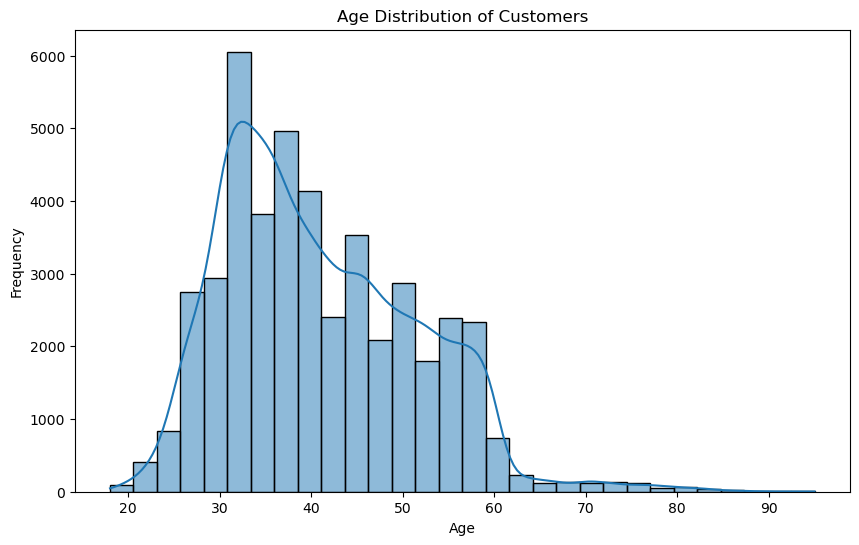

In [14]:
# Create a histogram for the 'age' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

By analyzing this graph, we can conclude that candidates between the ages of 30 and 40 have the highest frequency. Additionally, the graph exhibits a right skew. This means the data is clustered towards the left side of the graph, with a longer tail extending towards the right side.

The histogram illustration below shows which age range subcribes to a bank term deposit. 'Yes' is subscribe and 'No' is did not subscribe.

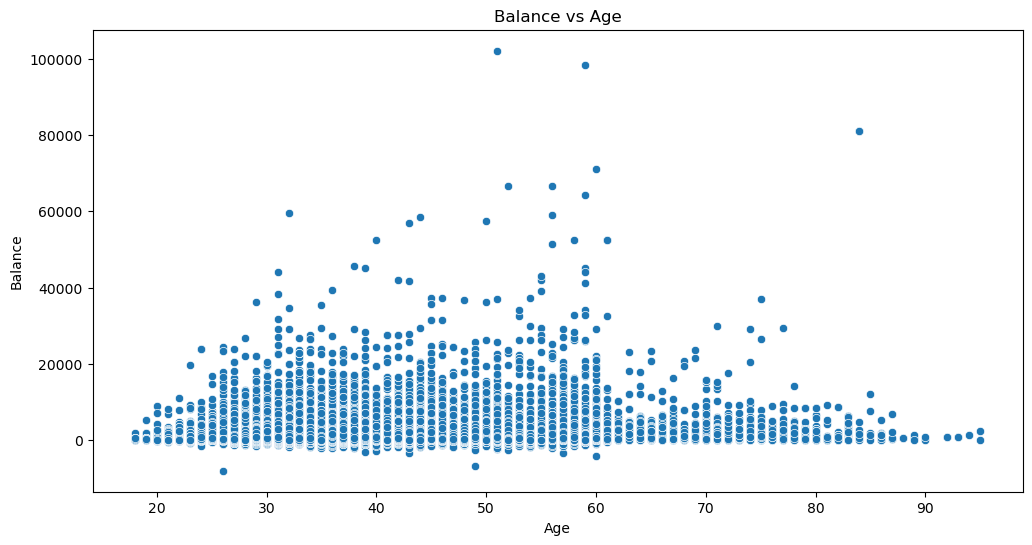

In [15]:
# Create a scatterplot for 'balance' vs 'age'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

Analyze the total number of people in each age group.

In [16]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

#create age ranges
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

#calculate the total number of people in each age range
age_range_counts = df['age_range'].value_counts().sort_index().reset_index()
age_range_counts.columns = ['age_range', 'count']

age_range_counts

,age_range,count
0,0-19,47
1,20-29,5226
2,30-39,18089
3,40-49,11655
4,50-59,8410
5,60-69,1230
6,70-79,424
7,80-89,121
8,90-100,9


Analyze the percentage of each age range of clients who subscribed to a bank's term deposit.

In [17]:
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'yes' else 0)

age_bins = [0, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-100']

#create age ranges
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df['age_range'] = df['age_range'].astype(str)

#group by age range and count the total number of people
total_counts = df.groupby('age_range').size().reset_index(name='total_count')

#group by age range and count the number of subscribers
subscribers_counts = df[df['Target'] == 1].groupby('age_range')['Target'].count().reset_index(name='subscriber_count')

#merge the two DataFrames
age_range_data = pd.merge(total_counts, subscribers_counts, on='age_range', how='left').fillna(0)

#calculate the percentage of subscribers in each age range
age_range_data['percentage_subscribers'] = (age_range_data['subscriber_count'] / age_range_data['total_count']) * 100

#print the results
for index, row in age_range_data.iterrows():
    age_range = row['age_range']
    total_count = row['total_count']
    subscriber_count = row['subscriber_count']
    percentage_subscribers = row['percentage_subscribers']
    print(f"{age_range}: ({subscriber_count}/{total_count}) -> {percentage_subscribers:.2f}%")



0-29: (1145/7030) -> 16.29%
30-39: (1812/17687) -> 10.24%
40-49: (1019/11239) -> 9.07%
50-59: (811/8067) -> 10.05%
60-69: (284/701) -> 40.51%
70-79: (175/388) -> 45.10%
80-100: (43/99) -> 43.43%


Visualize the percentage of each age range of clients who subscribed to a bank's term deposit.

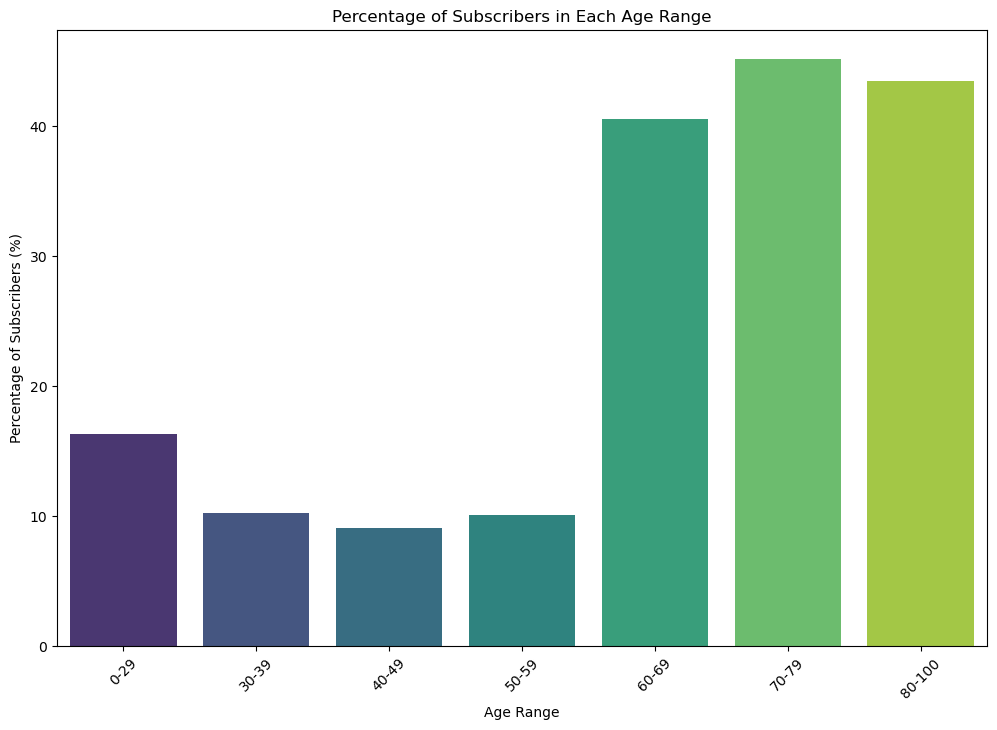

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age_range', y='percentage_subscribers', hue='age_range', data=age_range_data, palette='viridis')
plt.title('Percentage of Subscribers in Each Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage of Subscribers (%)')
plt.xticks(rotation=45)
plt.show()

# Data Mining - Correlation Analysis

Construct a correlation matrix graph to visualize the correlation coefficient between the variables. As observe in the graph, we can determine which pair of variables have a strong positive or negative correlation. The value ranges from -1 to +1, where -1 indicates a negative correlation and +1 indicates a positive correlation.

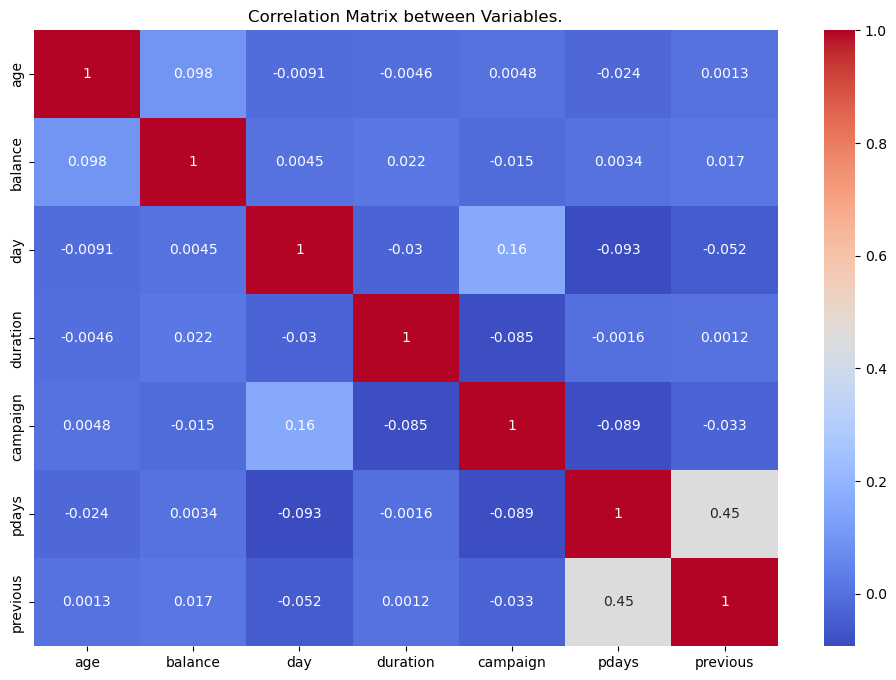

In [19]:
# Convert relevant columns to numeric, if not already
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Variables.')
plt.show()

# Data Mining - Even Rule-Based Clustering

This rule-based clustering of clients is based on their balance and age to classify them into lower, middle, and upper income classes. It then calculates the percentage of clients in each class who subscribe to a term deposit and visualizes the results. The goal is to segment clients by income class to identify which group is most likely to subscribe to term deposits, enabling targeted and more effective marketing strategies.

In [20]:
# Define even thresholds for clustering
def assign_even_cluster(row):
    if row['balance'] < 10000 and row['education'] in ['primary', 'secondary']:
        return 'Lower Class'
    elif 10000 <= row['balance'] < 20000 and row['education'] in ['secondary', 'tertiary']:
        return 'Middle Class'
    elif row['balance'] >= 20000 and row['education'] == 'tertiary':
        return 'Upper Class'
    else:
        return 'Undefined'

df['Even_Rule_Based_Cluster'] = df.apply(assign_even_cluster, axis=1)

# Filter out undefined clusters for clearer visualization
filtered_data_even = df[df['Even_Rule_Based_Cluster'] != 'Undefined']

# Analyze subscription rate by even rule-based cluster
subscription_rate_even_rule_based = filtered_data_even.groupby('Even_Rule_Based_Cluster')['Target'].value_counts(normalize=True).unstack().fillna(0)

subscription_rate_even_rule_based

Target,0,1
Even_Rule_Based_Cluster,,
Lower Class,0.899387,0.100613
Middle Class,0.829588,0.170412
Upper Class,0.843478,0.156522


Visualize the Even Rule-Based clusters.

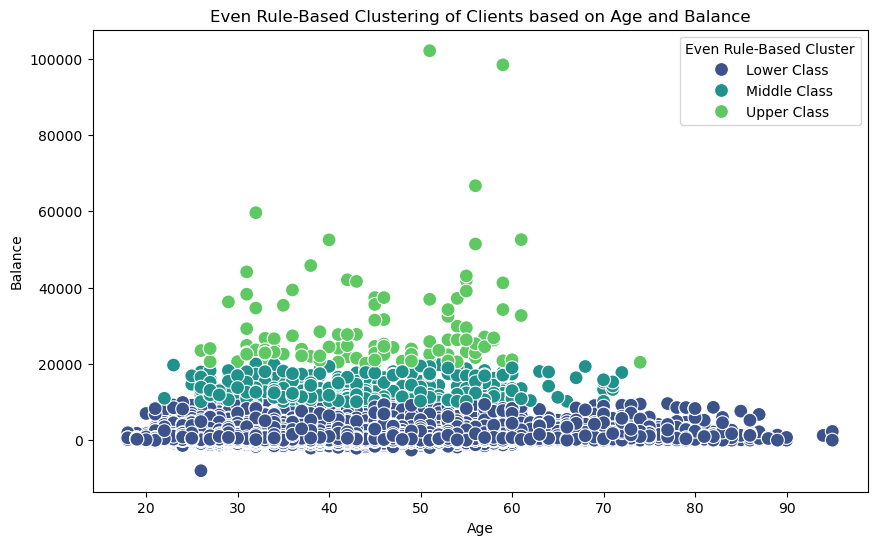

In [21]:
# Visualize the even rule-based clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='Even_Rule_Based_Cluster', palette='viridis', data=filtered_data_even, edgecolor='w', s=100)
plt.title('Even Rule-Based Clustering of Clients based on Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Even Rule-Based Cluster')
plt.show()

# Data Mining - Logistic Regression

Logistic regression uses the z function $z = \theta X$ and the sigmoid function $h = \frac{1}{1 + e^{-z}}$, where the sigmoid function takes a value and returns in the range of 0 to 1. In our dataset, 0 means not going to subscribe to the term deposit, and 1 means will subscribe to the term deposit.

We're going to split the dataset, with 70% of it used to train the logistic regression model and the other 30% used to test the model.

In [22]:
from sklearn.model_selection import train_test_split

train_logres, val_logres = train_test_split(logres_df, test_size = 0.3, random_state = 21)

Our X values, the independent variables, will be age, default, balance, housing, loan, campaign, pdays, previous, and poutcome. Meanwhile, Target will be the Y value.

In [23]:
X = train_logres.drop(columns = ['job', 'marital', 'education', 'contact', 'day', 'month', 'duration', 'Target'])
Y = train_logres['Target']

Since some of the columns e.g. balance, duration, pdays have a wide range of values, we will be using StandardScaler to make them in similar ranges to the other columns. This will help the data mining model be more accurate.

Here, we use Pipeline to apply the StandardScaler() and LogisticRegression() functions to process the data.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 1.0)
)

clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

We want to see the accuracy of our model so far, so we use predict() and then score() to see the accuracy. We get a score of 0.885, which is equivalent to 88.5%, meaning that our model is quite accurate.

In [26]:
X_val = val_logres.drop(columns = ['job', 'marital', 'education', 'contact', 'day', 'month', 'duration', 'Target'])
Y_val = val_logres['Target']
clf.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [27]:
clf.score(X_val, Y_val)

0.8851371276909467

Finally, we plot a barplot to see which X values take most importance for the model to predict the outcome.

Text(0.5, 0, 'Client Demographics')

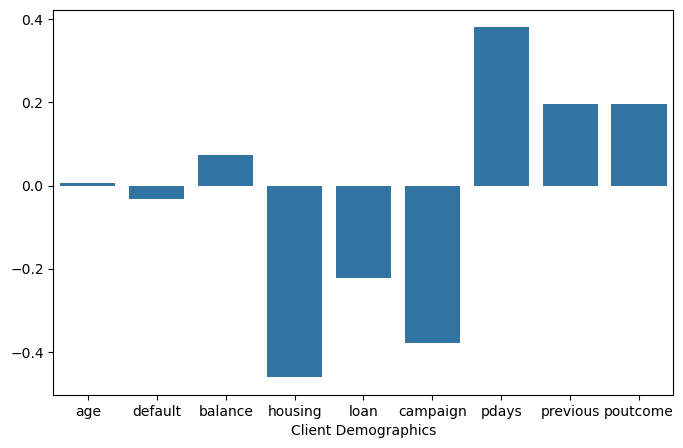

In [31]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(8,5))
sns.barplot(y = clf['logisticregression'].coef_.flatten(), x = X.columns, ax=ax)
plt.xlabel('Client Demographics')